In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import bs4 as bs
from datetime import timedelta
import urllib.request
import pandas as pd
import numpy as np

import matplotlib
# import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import seaborn as sns

In [19]:
data = pd.read_csv("/Volumes/Personal/DAEN 690 - Project/data_model.csv")
data = data.drop(['Unnamed: 0'], axis =1)

In [23]:
data[['ProcedurePerformed','Procedure_given_ALS?','Total_Number_of_procedures_performed']][200:210]

,ProcedurePerformed,Procedure_given_ALS?,Total_Number_of_procedures_performed
200,cv - ecg - 12 lead obtained|iv start - extremi...,0.0,3.0
201,none performed,none_given,0.0
202,cv - ecg - 12 lead obtained|iv start - extremi...,0.0,2.0
203,none performed,none_given,0.0
204,iv start - extremity vein (arm or leg),0.0,1.0
205,none performed,none_given,0.0
206,iv start - extremity vein (arm or leg),0.0,2.0
207,none performed,none_given,0.0
208,none performed,none_given,0.0
209,cv - ecg - 12 lead obtained|iv start - extremi...,0.0,2.0


In [3]:
data.dtypes

ShiftDay                                 object
TourOfShift                               int64
IncidentFirstDue                        float64
InitialIncidentType                      object
DispatchedIncidentType                   object
ArrivedIncidentType                      object
FinalIncidentType                        object
FinalIncidentTypeDescription             object
ResponseUnitID                           object
UnitStation                               int64
UnitType                                 object
UnitArrivalOrder                          int64
PatientID                               float64
TransportUnitID                          object
TransportLOC                             object
TransportHospitalCode                   float64
ReasonForChoosingHospital                object
PatientAge                               object
Total_Number_of_procedures_performed    float64
Procedure_given_ALS?                     object
Total_Number_of_medications_given       

In [4]:
data.TourOfShift = data.TourOfShift.astype('object')
data.IncidentFirstDue = data.IncidentFirstDue.astype('object')
data.UnitStation = data.UnitStation.astype('object')
data.UnitArrivalOrder = data.UnitArrivalOrder.astype('object')
data.TransportHospitalCode = data.TransportHospitalCode.astype('object')

In [5]:
print(data['Travel_time_taken'][data['Travel_time_taken'] <= 0])
print(data['Time_taken_to_be_atscene'][data['Time_taken_to_be_atscene'] <=0])
print(data['Total_time_from_report_hospital'][data['Total_time_from_report_hospital'] <= 0])

Series([], Name: Travel_time_taken, dtype: float64)
Series([], Name: Time_taken_to_be_atscene, dtype: float64)
Series([], Name: Total_time_from_report_hospital, dtype: float64)


In [6]:
data['Travel_time_taken'][data['Travel_time_taken'] <= 0] = data['Travel_time_taken'].mean()
data['Time_taken_to_be_atscene'][data['Time_taken_to_be_atscene'] <=0] = data['Time_taken_to_be_atscene'].mean()
data['Total_time_from_report_hospital'][data['Total_time_from_report_hospital'] <= 0] = data['Total_time_from_report_hospital'].mean()

/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/931481625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Travel_time_taken'][data['Travel_time_taken'] <= 0] = data['Travel_time_taken'].mean()
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/931481625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_taken_to_be_atscene'][data['Time_taken_to_be_atscene'] <=0] = data['Time_taken_to_be_atscene'].mean()
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/931481625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [61]:
data['FinalIncidentType'].value_counts()

ALS         69185
MEDICAL     35413
ACCI         9446
ODF          5152
CPRF         3027
SUIAF         341
AMED          280
ASSAULT       275
PSERVF        242
OTHERS        115
ASLTWF         66
FHOU           47
FACCIF         36
CAVEIN         27
GFRESCUE       26
GASIN          19
FGAPT          18
RTRAP          18
FTH            15
FBLDG          14
RESCUE         14
FHIRIS          7
Name: FinalIncidentType, dtype: int64

### 1 

Complete data for the model fit.

In [8]:
data1 = data

In [9]:
data1= data1.drop(['PatientID','Facility Name','Facility_Type_Of_Facility'],axis =1)

In [10]:
data1 = pd.get_dummies(data1, columns = ['ShiftDay','TourOfShift','IncidentFirstDue', 
                                        'InitialIncidentType', 'DispatchedIncidentType', 'ArrivedIncidentType', 
                                        'FinalIncidentType', 'UnitStation', 'ResponseUnitID', 'UnitType', 
                                        'UnitArrivalOrder', 'TransportUnitID', 'TransportLOC', 'TransportHospitalCode',
                                        'PatientAge', 'Procedure_given_ALS?', 'Medication_given_ALS?', 'clean_primary_impression', 
                                        'FinalIncidentTypeDescription'])

In [11]:
data1

,ReasonForChoosingHospital,Total_Number_of_procedures_performed,Total_Number_of_medications_given,Number_of_units_responded,Number_of_units_transported,Travel_time_taken,Time_taken_to_be_atscene,Total_time_from_report_hospital,Number of providers,SecondaryImpression,...,FinalIncidentTypeDescription_MEDICAL EMERGENCY,FinalIncidentTypeDescription_OVERDOSE - DRUG/ETOH/POISON,FinalIncidentTypeDescription_PUBLIC SERVICE: FIRE,FinalIncidentTypeDescription_PUBLIC SERVICE: LOCK OUT,FinalIncidentTypeDescription_RESCUE OF PERSON TRAPPED/PINNED,FinalIncidentTypeDescription_RIVER RESCUE ON LOWER POTOMAC,FinalIncidentTypeDescription_STILL ALARM,FinalIncidentTypeDescription_SUICIDE ATTEMPT,FinalIncidentTypeDescription_SWIFT WATER RESCUE,FinalIncidentTypeDescription_WATER RESCUE - LAKE OR POND
0,closest facility,0.0,0.0,5,1,4.0,23.0,27.0,1,none,...,0,0,0,0,0,0,0,0,0,0
1,protocol,2.0,0.0,5,1,19.0,27.0,47.0,2,none,...,0,0,0,0,0,0,0,0,0,0
2,closest facility,0.0,0.0,0,1,2.0,11.0,14.0,1,none,...,1,0,0,0,0,0,0,0,0,0
3,closest facility,0.0,0.0,1,1,1.0,6.0,7.0,1,none,...,0,0,0,0,0,0,0,0,0,0
4,closest facility,3.0,2.0,1,1,8.0,25.0,33.0,1,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123778,patient choice,1.0,0.0,8,1,23.0,31.0,54.0,1,none,...,0,0,0,0,0,0,0,0,0,0
123779,patient choice,1.0,0.0,1,1,104.0,31.0,135.0,1,none,...,0,1,0,0,0,0,0,0,0,0
123780,patient choice,1.0,1.0,1,1,20.0,24.0,45.0,1,none,...,0,0,0,0,0,0,0,0,0,0
123781,patient choice,1.0,0.0,1,1,26.0,32.0,59.0,1,none,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
data1 = pd.concat([data1.drop('SecondaryImpression', 1), data1['SecondaryImpression'].str.get_dummies(sep=",").add_prefix('SecondaryImpression_')], 1)
data1 = pd.concat([data1.drop('MedicationGiven', 1), data1['MedicationGiven'].str.get_dummies(sep="|").add_prefix('MedicationGiven_')], 1)
data1 = pd.concat([data1.drop('ProcedurePerformed', 1), data1['ProcedurePerformed'].str.get_dummies(sep="|").add_prefix('ProcedurePerformed_')], 1)
data1 = pd.concat([data1.drop('Facility_Hospital_Designation_List', 1), data1['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)
data1 = pd.concat([data1.drop('Unitotheractions_taken', 1), data1['Unitotheractions_taken'].str.get_dummies(sep="|").add_prefix('Unitotheractions_taken_')], 1)
data1 = pd.concat([data1.drop('Unitprimaryactions_taken', 1), data1['Unitprimaryactions_taken'].str.get_dummies(sep="|").add_prefix('Unitprimaryactions_taken_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/4034899230.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/4034899230.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/4034899230.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = pd.concat([data1.drop('SecondaryImpression', 1), data1['S

In [14]:
data1.shape

(123783, 865)

Fitting the Kmeans for different values of clusters, noting the cost/inertia value for each fit and then plotting using a elbow plot.

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list1 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(data1)
    inertia_list1.append(kmeans_model.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

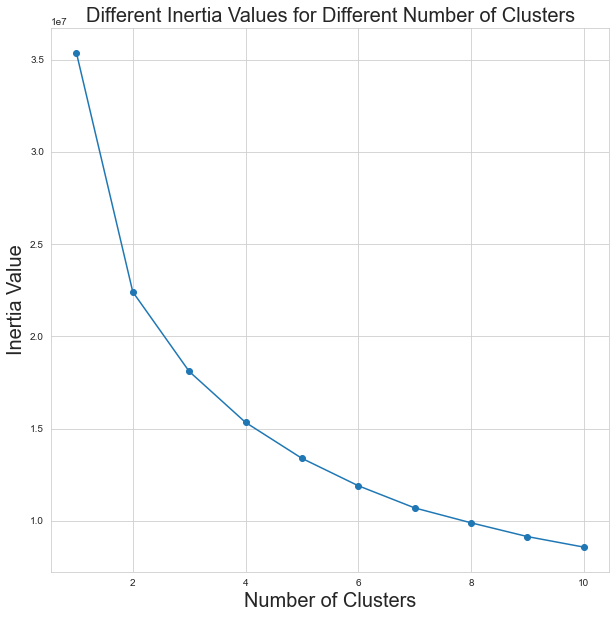

In [18]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list1)
plt.scatter(range(1,11),inertia_list1)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

Using standard scalar for standardizing/normalizing the data.

PCA analysis method to find out the best number of components which can make upto 95% of variance of the data.

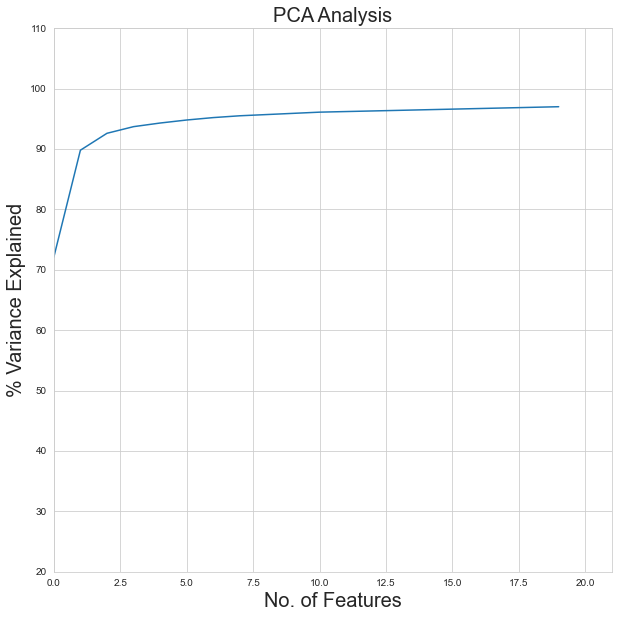

In [25]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data1)

#Calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
var_voc=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.plot(var_voc)

In [21]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled1 = min_max_scaler.fit_transform(data1)

scaled_data1 = pd.DataFrame(np_scaled1)

# reduce to 2 importants features

pca = PCA(n_components=3)
data_pca = pca.fit_transform(scaled_data1)


In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list111 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_pca)
    pca_inertia_list111.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 5755675.498846663.
Iteration 1, inertia 3472348.386379949.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6202966.8536799215.
Iteration 1, inertia 3472348.386379949.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7499816.467916522.
Iteration 1, inertia 3472348.386379949.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8225247.321308542.
Iteration 1, inertia 3472348.386379949.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5353297.4191732835.
Iteration 1, inertia 3472348.386379949.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3281610.7214387683
Iteration 1, inertia 2529635.3071534955
Iteration 2, inertia 2468756.1046510916
Iteration 3, inertia 2453367.423521747
Iteration 4, inertia 2447697.7401437038
Iteration 5, inertia 2445

Iteration 4, inertia 1589529.2553180947
Iteration 5, inertia 1589067.857600574
Iteration 6, inertia 1588635.1387376585
Iteration 7, inertia 1588117.339432183
Iteration 8, inertia 1587333.3875585399
Iteration 9, inertia 1586223.200652797
Iteration 10, inertia 1584884.952166454
Iteration 11, inertia 1583508.0404427135
Iteration 12, inertia 1582184.4139724104
Iteration 13, inertia 1580903.3607704588
Iteration 14, inertia 1579768.5632344426
Iteration 15, inertia 1578837.7124191504
Iteration 16, inertia 1578188.960498774
Iteration 17, inertia 1577730.53706777
Iteration 18, inertia 1577421.0745318648
Iteration 19, inertia 1577199.825125331
Iteration 20, inertia 1577012.1835173524
Iteration 21, inertia 1576887.2656063363
Iteration 22, inertia 1576812.7799604854
Iteration 23, inertia 1576766.299948676
Converged at iteration 23: center shift 0.00064048306553646 within tolerance 0.0009350633464422829.
Initialization complete
Iteration 0, inertia 2019919.580834484
Iteration 1, inertia 1659617.723

Initialization complete
Iteration 0, inertia 911255.3808140885
Iteration 1, inertia 793446.852779916
Iteration 2, inertia 777695.8873150338
Iteration 3, inertia 766540.6474753299
Iteration 4, inertia 755426.2326051792
Iteration 5, inertia 742085.3182373552
Iteration 6, inertia 726360.1721310834
Iteration 7, inertia 712181.3319921204
Iteration 8, inertia 700647.2321114341
Iteration 9, inertia 692442.3228835557
Iteration 10, inertia 688474.9138960738
Iteration 11, inertia 687066.1960052437
Iteration 12, inertia 686568.7211695254
Iteration 13, inertia 686355.4012652021
Iteration 14, inertia 686265.6864247816
Iteration 15, inertia 686215.3902605168
Iteration 16, inertia 686190.9778178579
Iteration 17, inertia 686175.2779696684
Iteration 18, inertia 686166.3097066324
Converged at iteration 18: center shift 0.0009190114941004248 within tolerance 0.0009350633464422829.
Initialization complete
Iteration 0, inertia 886025.3844764221
Iteration 1, inertia 756920.4079226136
Iteration 2, inertia 73

Iteration 21, inertia 536434.1973921256
Converged at iteration 21: center shift 0.0006255873402851753 within tolerance 0.0009350633464422829.
Initialization complete
Iteration 0, inertia 774927.3057666374
Iteration 1, inertia 601693.4277018837
Iteration 2, inertia 588752.8483040788
Iteration 3, inertia 583369.0513728361
Iteration 4, inertia 580287.2029405945
Iteration 5, inertia 578097.9483566422
Iteration 6, inertia 576266.4711099856
Iteration 7, inertia 574501.0484299185
Iteration 8, inertia 572558.6780389184
Iteration 9, inertia 569921.7965504878
Iteration 10, inertia 566035.8272161665
Iteration 11, inertia 560529.7346102264
Iteration 12, inertia 554320.8643586522
Iteration 13, inertia 548040.7002761225
Iteration 14, inertia 542658.3258491752
Iteration 15, inertia 539242.836584791
Iteration 16, inertia 537740.9267972566
Iteration 17, inertia 537097.6120597925
Iteration 18, inertia 536769.9801420354
Iteration 19, inertia 536596.514634288
Iteration 20, inertia 536512.7455565557
Iterat

Iteration 0, inertia 722913.4553733752
Iteration 1, inertia 595026.5160219754
Iteration 2, inertia 574329.525313541
Iteration 3, inertia 565588.837577688
Iteration 4, inertia 562322.1080080864
Iteration 5, inertia 560463.7623716298
Iteration 6, inertia 559327.6288909251
Iteration 7, inertia 558552.6048687482
Iteration 8, inertia 557831.66808476
Iteration 9, inertia 556956.077871908
Iteration 10, inertia 555873.6293552087
Iteration 11, inertia 554685.8524390429
Iteration 12, inertia 553445.3448833621
Iteration 13, inertia 552250.4581545511
Iteration 14, inertia 550944.7258674954
Iteration 15, inertia 549642.0892972318
Iteration 16, inertia 548694.5168269157
Iteration 17, inertia 548090.1298393977
Iteration 18, inertia 547704.0152607465
Iteration 19, inertia 547429.9070320714
Iteration 20, inertia 547241.5796428886
Iteration 21, inertia 547104.5010113622
Iteration 22, inertia 546975.017610102
Iteration 23, inertia 546841.4238303918
Iteration 24, inertia 546698.5697179474
Iteration 25, in

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

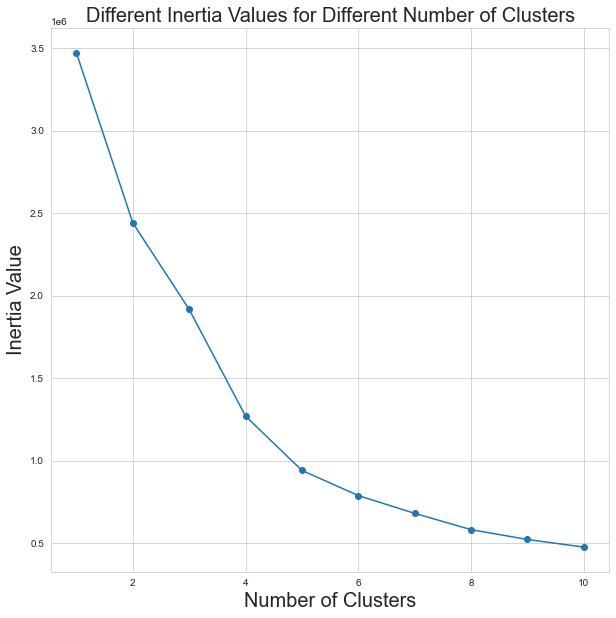

In [27]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list111)
plt.scatter(range(1,11),inertia_list111)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [126]:
data11 = data.drop(['PatientID', 'InitialIncidentType', 'DispatchedIncidentType',
                    'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID', 
                    'UnitStation','UnitArrivalOrder','TransportUnitID', 'IncidentFirstDue','ShiftDay', 
                    'TourOfShift','TransportHospitalCode','Number_of_units_transported',
                    'Unitotheractions_taken','ProcedurePerformed', 'MedicationGiven', 
                     'Facility_Type_Of_Facility','UnitType','Facility Name'], axis =1)

In [127]:
data11.columns

Index(['FinalIncidentType', 'TransportLOC', 'ReasonForChoosingHospital',
       'PatientAge', 'Total_Number_of_procedures_performed',
       'Procedure_given_ALS?', 'Total_Number_of_medications_given',
       'Medication_given_ALS?', 'Number_of_units_responded',
       'Travel_time_taken', 'Time_taken_to_be_atscene',
       'Total_time_from_report_hospital', 'clean_primary_impression',
       'Number of providers', 'SecondaryImpression',
       'Unitprimaryactions_taken', 'Facility_Hospital_Designation_List',
       'Distance'],
      dtype='object')

In [129]:
data11 = pd.get_dummies(data11, columns = ['FinalIncidentType', 'TransportLOC',
                                        'PatientAge', 'Procedure_given_ALS?', 
                                           'Medication_given_ALS?', 'clean_primary_impression'])

In [130]:
data11 = pd.concat([data11.drop('ReasonForChoosingHospital', 1), data11['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data11 = pd.concat([data11.drop('SecondaryImpression', 1), data11['SecondaryImpression'].str.get_dummies(sep=",").add_prefix('SecondaryImpression_')], 1)
data11 = pd.concat([data11.drop('Facility_Hospital_Designation_List', 1), data11['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)
data11 = pd.concat([data11.drop('Unitprimaryactions_taken', 1), data11['Unitprimaryactions_taken'].str.get_dummies(sep="|").add_prefix('Unitprimaryactions_taken')], 1)



/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/3147025285.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data11 = pd.concat([data11.drop('ReasonForChoosingHospital', 1), data11['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/3147025285.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data11 = pd.concat([data11.drop('ReasonForChoosingHospital', 1), data11['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/3147025285.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data11 = pd.concat([data11.drop('SecondaryImpression', 1), 

Without Dimensionality Reduction.

In [131]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list121 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data11)
    inertia_list121.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 59753665.24909708.
Iteration 1, inertia 34006299.93829399.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 47286331.66467579.
Iteration 1, inertia 34006299.93829399.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 43031955.61872716.
Iteration 1, inertia 34006299.93829399.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 36347639.642832264.
Iteration 1, inertia 34006299.93829399.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 39693762.774953194.
Iteration 1, inertia 34006299.93829399.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 27540239.33541602
Iteration 1, inertia 21335506.771431506
Iteration 2, inertia 21144229.315765165
Iteration 3, inertia 21093136.497971445
Iteration 4, inertia 21070622.820022907
Iteration 5, inertia 2106

Iteration 26, inertia 16747103.563515134
Iteration 27, inertia 16747091.439229771
Iteration 28, inertia 16747079.09690766
Iteration 29, inertia 16747065.138860732
Converged at iteration 29: center shift 0.00015383873276969895 within tolerance 0.00017839293721223472.
Initialization complete
Iteration 0, inertia 23623437.693293076
Iteration 1, inertia 19440205.131764047
Iteration 2, inertia 18456508.734185785
Iteration 3, inertia 17891416.751952108
Iteration 4, inertia 17532069.199111424
Iteration 5, inertia 17296410.843852773
Iteration 6, inertia 17137313.76792075
Iteration 7, inertia 17024849.712013744
Iteration 8, inertia 16945530.26248248
Iteration 9, inertia 16888451.949512422
Iteration 10, inertia 16849743.75569497
Iteration 11, inertia 16819390.53418959
Iteration 12, inertia 16796939.07816565
Iteration 13, inertia 16782906.47019481
Iteration 14, inertia 16774320.535001826
Iteration 15, inertia 16768746.589853637
Iteration 16, inertia 16764499.706697911
Iteration 17, inertia 167610

Iteration 17, inertia 14688435.164382141
Iteration 18, inertia 14682919.780651648
Iteration 19, inertia 14677434.317345716
Iteration 20, inertia 14673186.627535231
Iteration 21, inertia 14669120.29119949
Iteration 22, inertia 14665126.966390882
Iteration 23, inertia 14660927.354640353
Iteration 24, inertia 14657725.162157223
Iteration 25, inertia 14654433.645547874
Iteration 26, inertia 14651703.073457811
Iteration 27, inertia 14649365.114962222
Iteration 28, inertia 14646904.060204923
Iteration 29, inertia 14644315.727004109
Iteration 30, inertia 14641980.877051752
Iteration 31, inertia 14639768.47413303
Iteration 32, inertia 14636904.521096434
Iteration 33, inertia 14633601.105096012
Iteration 34, inertia 14630346.290201101
Iteration 35, inertia 14626838.060837077
Iteration 36, inertia 14622341.215631127
Iteration 37, inertia 14617857.34207562
Iteration 38, inertia 14612372.094465367
Iteration 39, inertia 14606533.423990287
Iteration 40, inertia 14599936.83855946
Iteration 41, inerti

Iteration 89, inertia 14278613.304565854
Iteration 90, inertia 14272453.751323868
Iteration 91, inertia 14267051.855307408
Iteration 92, inertia 14261772.605421096
Iteration 93, inertia 14255501.91073021
Iteration 94, inertia 14247764.746662972
Iteration 95, inertia 14241573.132526359
Iteration 96, inertia 14237175.481394246
Iteration 97, inertia 14234263.630875777
Iteration 98, inertia 14231943.246962745
Iteration 99, inertia 14230330.967926431
Iteration 100, inertia 14228981.783018596
Iteration 101, inertia 14227468.369328458
Iteration 102, inertia 14225641.908751827
Iteration 103, inertia 14224988.487127677
Iteration 104, inertia 14224826.9280819
Iteration 105, inertia 14224733.896654304
Iteration 106, inertia 14224702.442735285
Iteration 107, inertia 14224687.875364542
Iteration 108, inertia 14224675.566344632
Iteration 109, inertia 14224599.123681456
Iteration 110, inertia 14223964.936090421
Iteration 111, inertia 14222983.622438703
Iteration 112, inertia 14221902.769938394
Iterat

Iteration 44, inertia 12035750.184939943
Iteration 45, inertia 12035741.10653634
Iteration 46, inertia 12035733.62719548
Iteration 47, inertia 12035723.44505036
Iteration 48, inertia 12035710.900029935
Iteration 49, inertia 12035703.347418383
Iteration 50, inertia 12035698.971405895
Converged at iteration 50: center shift 0.0001065714698800847 within tolerance 0.00017839293721223472.
Initialization complete
Iteration 0, inertia 15662544.657066371
Iteration 1, inertia 12897054.220750254
Iteration 2, inertia 12682001.294038799
Iteration 3, inertia 12563009.088307647
Iteration 4, inertia 12463897.63864409
Iteration 5, inertia 12386054.168348175
Iteration 6, inertia 12319207.003858238
Iteration 7, inertia 12264284.76347236
Iteration 8, inertia 12223526.765731422
Iteration 9, inertia 12194443.50616214
Iteration 10, inertia 12171851.587629268
Iteration 11, inertia 12156196.582199164
Iteration 12, inertia 12142599.609837197
Iteration 13, inertia 12131281.26134198
Iteration 14, inertia 1212096

Iteration 36, inertia 12326159.813264199
Iteration 37, inertia 12294194.822797436
Iteration 38, inertia 12259786.10156431
Iteration 39, inertia 12221020.934337672
Iteration 40, inertia 12147978.64622502
Iteration 41, inertia 12085588.658116097
Iteration 42, inertia 12073646.808087021
Iteration 43, inertia 12069958.309492406
Iteration 44, inertia 12065794.275923818
Iteration 45, inertia 12063351.327027706
Iteration 46, inertia 12061829.118465956
Iteration 47, inertia 12060619.09441435
Iteration 48, inertia 12059339.546949334
Iteration 49, inertia 12058122.15118792
Iteration 50, inertia 12057296.368655056
Iteration 51, inertia 12056832.677031036
Iteration 52, inertia 12056214.538603485
Iteration 53, inertia 12055945.187451027
Iteration 54, inertia 12055737.376719885
Iteration 55, inertia 12055615.677370511
Iteration 56, inertia 12055544.792327069
Iteration 57, inertia 12055499.37436194
Iteration 58, inertia 12055461.254061945
Iteration 59, inertia 12055428.089374866
Iteration 60, inertia

Initialization complete
Iteration 0, inertia 14744433.310791776
Iteration 1, inertia 11149255.465277031
Iteration 2, inertia 10795382.30895913
Iteration 3, inertia 10727456.364141764
Iteration 4, inertia 10698103.634278681
Iteration 5, inertia 10685486.268712748
Iteration 6, inertia 10676810.57880968
Iteration 7, inertia 10671613.127920637
Iteration 8, inertia 10668313.243481651
Iteration 9, inertia 10665982.718823217
Iteration 10, inertia 10664366.961181475
Iteration 11, inertia 10663153.416312527
Iteration 12, inertia 10662184.568391075
Iteration 13, inertia 10661493.212532386
Iteration 14, inertia 10661053.461253073
Iteration 15, inertia 10660694.178001044
Iteration 16, inertia 10660306.534970134
Iteration 17, inertia 10659896.592308264
Iteration 18, inertia 10659379.101203583
Iteration 19, inertia 10658871.135438234
Iteration 20, inertia 10658438.78268083
Iteration 21, inertia 10657960.111050278
Iteration 22, inertia 10657452.228648208
Iteration 23, inertia 10657135.381756661
Itera

Iteration 88, inertia 9351912.323557382
Iteration 89, inertia 9351900.457574533
Iteration 90, inertia 9351892.71991163
Iteration 91, inertia 9351888.61094493
Iteration 92, inertia 9351885.341394538
Converged at iteration 92: center shift 3.204861666066019e-05 within tolerance 0.00017839293721223472.
Initialization complete
Iteration 0, inertia 13342770.24829258
Iteration 1, inertia 11404586.419198696
Iteration 2, inertia 10950096.482346585
Iteration 3, inertia 10405606.894245882
Iteration 4, inertia 10116089.485850066
Iteration 5, inertia 9988096.955429442
Iteration 6, inertia 9868793.401392385
Iteration 7, inertia 9732149.351009313
Iteration 8, inertia 9597151.963721918
Iteration 9, inertia 9490379.667994432
Iteration 10, inertia 9427547.012207594
Iteration 11, inertia 9394793.205116602
Iteration 12, inertia 9377522.082929749
Iteration 13, inertia 9368313.893394243
Iteration 14, inertia 9364212.73574351
Iteration 15, inertia 9361563.901652329
Iteration 16, inertia 9359772.528639348
It

Iteration 42, inertia 9352533.857718447
Iteration 43, inertia 9352287.344145006
Iteration 44, inertia 9352157.449144145
Iteration 45, inertia 9352077.131994046
Iteration 46, inertia 9352017.365592694
Iteration 47, inertia 9351966.344590448
Iteration 48, inertia 9351925.561752422
Iteration 49, inertia 9351908.913155064
Iteration 50, inertia 9351903.321151461
Converged at iteration 50: center shift 7.102364043635732e-05 within tolerance 0.00017839293721223472.
Initialization complete
Iteration 0, inertia 10935175.36142197
Iteration 1, inertia 8825549.98644808
Iteration 2, inertia 8686197.072572008
Iteration 3, inertia 8644937.270259246
Iteration 4, inertia 8626794.171015687
Iteration 5, inertia 8618077.540823292
Iteration 6, inertia 8613058.25297057
Iteration 7, inertia 8609341.06025601
Iteration 8, inertia 8605913.57114794
Iteration 9, inertia 8602812.621175375
Iteration 10, inertia 8599619.550794031
Iteration 11, inertia 8595997.658161446
Iteration 12, inertia 8592694.340423161
Iterati

Iteration 47, inertia 8575527.557941275
Iteration 48, inertia 8572238.818115935
Iteration 49, inertia 8567893.41734113
Iteration 50, inertia 8567279.109390505
Iteration 51, inertia 8566831.363528661
Iteration 52, inertia 8563758.415925391
Iteration 53, inertia 8559118.741479319
Iteration 54, inertia 8545876.526212499
Iteration 55, inertia 8537614.535996048
Iteration 56, inertia 8536304.26949561
Iteration 57, inertia 8535498.330396604
Iteration 58, inertia 8534720.042482633
Iteration 59, inertia 8534419.469524214
Iteration 60, inertia 8534084.477350637
Iteration 61, inertia 8533809.292990414
Iteration 62, inertia 8533353.921430323
Iteration 63, inertia 8532992.517578242
Iteration 64, inertia 8532682.41655117
Iteration 65, inertia 8532352.18032865
Iteration 66, inertia 8532194.276751373
Iteration 67, inertia 8532054.643176928
Iteration 68, inertia 8531918.320034048
Iteration 69, inertia 8531795.45548407
Iteration 70, inertia 8531728.287538484
Iteration 71, inertia 8531665.103382671
Itera

Iteration 78, inertia 7858946.78223074
Iteration 79, inertia 7858875.843773203
Iteration 80, inertia 7858816.473976928
Iteration 81, inertia 7858760.262386197
Iteration 82, inertia 7858697.380881047
Iteration 83, inertia 7858643.676641922
Iteration 84, inertia 7858595.216906589
Iteration 85, inertia 7858536.6507486105
Iteration 86, inertia 7858495.109660901
Iteration 87, inertia 7858477.170361691
Iteration 88, inertia 7858462.366734686
Iteration 89, inertia 7858454.871685826
Iteration 90, inertia 7858447.879200344
Converged at iteration 90: center shift 0.00012716574906878415 within tolerance 0.00017839293721223472.
Initialization complete
Iteration 0, inertia 11479481.995351393
Iteration 1, inertia 8832986.10955509
Iteration 2, inertia 8526084.496738667
Iteration 3, inertia 8373084.410841383
Iteration 4, inertia 8285948.09424876
Iteration 5, inertia 8202381.968287597
Iteration 6, inertia 8126402.491044624
Iteration 7, inertia 8058338.549142761
Iteration 8, inertia 8005259.106535137
It

Iteration 30, inertia 7244832.368640698
Iteration 31, inertia 7244589.375479825
Iteration 32, inertia 7244401.055487806
Iteration 33, inertia 7244250.621895844
Iteration 34, inertia 7244168.228583531
Iteration 35, inertia 7244103.177860377
Iteration 36, inertia 7243989.926404532
Iteration 37, inertia 7243915.186399169
Iteration 38, inertia 7243848.648177017
Iteration 39, inertia 7243795.392217283
Iteration 40, inertia 7243723.5551364655
Iteration 41, inertia 7243625.617270725
Iteration 42, inertia 7243518.309036039
Iteration 43, inertia 7243462.538427623
Iteration 44, inertia 7243416.982119441
Iteration 45, inertia 7243381.397321671
Iteration 46, inertia 7243353.728336699
Iteration 47, inertia 7243327.407899338
Iteration 48, inertia 7243306.439239401
Iteration 49, inertia 7243289.92309448
Iteration 50, inertia 7243277.614655438
Iteration 51, inertia 7243262.661598282
Iteration 52, inertia 7243247.703332592
Iteration 53, inertia 7243237.067289138
Iteration 54, inertia 7243232.639473521


Iteration 14, inertia 7291685.492810478
Iteration 15, inertia 7282909.647304704
Iteration 16, inertia 7265935.879543534
Iteration 17, inertia 7251597.865636254
Iteration 18, inertia 7244350.103320191
Iteration 19, inertia 7240006.601191208
Iteration 20, inertia 7237337.863857167
Iteration 21, inertia 7235627.608792167
Iteration 22, inertia 7234660.938911707
Iteration 23, inertia 7234101.199625
Iteration 24, inertia 7233753.632023735
Iteration 25, inertia 7233496.078388683
Iteration 26, inertia 7233311.935498608
Iteration 27, inertia 7233142.839847084
Iteration 28, inertia 7232976.206921462
Iteration 29, inertia 7232724.908612296
Iteration 30, inertia 7232262.977949748
Iteration 31, inertia 7231628.519533066
Iteration 32, inertia 7231120.330713008
Iteration 33, inertia 7230828.721008192
Iteration 34, inertia 7230657.835266782
Iteration 35, inertia 7230583.199098058
Iteration 36, inertia 7230532.922157894
Iteration 37, inertia 7230501.289481143
Iteration 38, inertia 7230485.715437058
Ite

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

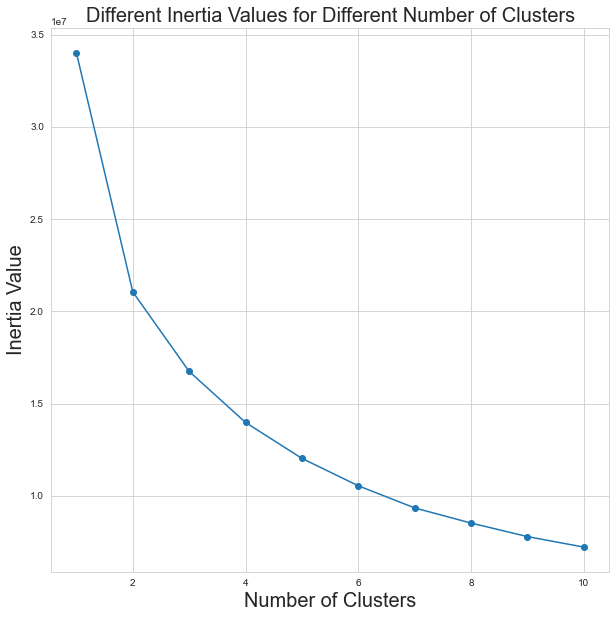

In [132]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list121)
plt.scatter(range(1,11),inertia_list121)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

With dimensionality Reduction

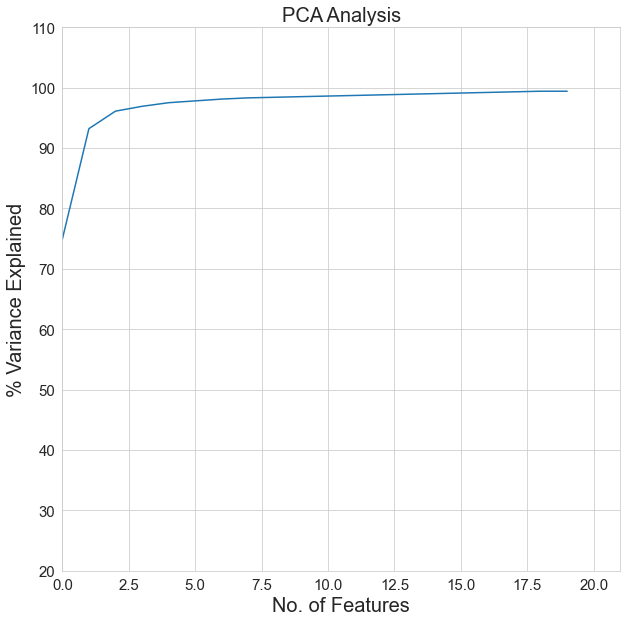

In [133]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data11)

#Calculate variance ratios
variance11 = covar_matrix.explained_variance_ratio_ 
var_voc11=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc11

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(var_voc11)

In [134]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled11 = min_max_scaler.fit_transform(data11)

scaled_data11 = pd.DataFrame(np_scaled11)

# reduce to 2 importants features

pca = PCA(n_components=3)
data11_pca = pca.fit_transform(scaled_data11)


In [135]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list121 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data11_pca)
    pca_inertia_list121.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 2879115.320952886.
Iteration 1, inertia 1617426.4268817855.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4871526.934004606.
Iteration 1, inertia 1617426.4268817855.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2992815.1274204645.
Iteration 1, inertia 1617426.4268817855.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1891795.17488833.
Iteration 1, inertia 1617426.4268817855.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3036491.03149853.
Iteration 1, inertia 1617426.4268817855.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1869664.0533345386
Iteration 1, inertia 1064924.9592957993
Iteration 2, inertia 1061794.8824361684
Iteration 3, inertia 1061157.5933269893
Iteration 4, inertia 1061011.439862893
Iteration 5, inertia 10

Iteration 6, inertia 617624.2221867817
Iteration 7, inertia 617599.6523267792
Converged at iteration 7: center shift 0.00036483671842198407 within tolerance 0.0004355542702099084.
Initialization complete
Iteration 0, inertia 908590.8635174277
Iteration 1, inertia 666982.3502016761
Iteration 2, inertia 662634.2604831166
Iteration 3, inertia 661942.343340371
Iteration 4, inertia 661752.2876930884
Iteration 5, inertia 661624.2116772513
Iteration 6, inertia 661477.6283686851
Iteration 7, inertia 661268.6430676326
Iteration 8, inertia 660991.6464810348
Iteration 9, inertia 660588.5794507654
Iteration 10, inertia 659975.484926525
Iteration 11, inertia 659131.9367445074
Iteration 12, inertia 657980.0273634067
Iteration 13, inertia 656476.4967942373
Iteration 14, inertia 654684.2633390148
Iteration 15, inertia 652849.0465001708
Iteration 16, inertia 651164.2393097635
Iteration 17, inertia 649697.9162063204
Iteration 18, inertia 648452.7310358904
Iteration 19, inertia 647450.3798301859
Iteratio

Iteration 19, inertia 429147.0793007328
Iteration 20, inertia 429044.76463743794
Iteration 21, inertia 428946.73049037956
Iteration 22, inertia 428847.01468194195
Iteration 23, inertia 428755.0301945973
Iteration 24, inertia 428667.7390645335
Iteration 25, inertia 428593.66080999747
Iteration 26, inertia 428525.2145035543
Iteration 27, inertia 428474.3322673943
Iteration 28, inertia 428433.14677020104
Iteration 29, inertia 428398.08896088914
Iteration 30, inertia 428360.3671676052
Iteration 31, inertia 428325.483068199
Iteration 32, inertia 428295.3884786062
Iteration 33, inertia 428270.0285967006
Iteration 34, inertia 428248.18068662245
Iteration 35, inertia 428229.4523162917
Iteration 36, inertia 428212.5961801107
Iteration 37, inertia 428198.6262521262
Converged at iteration 37: center shift 0.00027447395733039715 within tolerance 0.0004355542702099084.
Initialization complete
Iteration 0, inertia 565951.3781140118
Iteration 1, inertia 443645.0225995442
Iteration 2, inertia 414761.7

Initialization complete
Iteration 0, inertia 463651.77070553723
Iteration 1, inertia 397932.73138944665
Iteration 2, inertia 384155.7970673813
Iteration 3, inertia 376435.285390395
Iteration 4, inertia 371674.5255734554
Iteration 5, inertia 368801.9565814318
Iteration 6, inertia 366947.7693619538
Iteration 7, inertia 365861.7128320548
Iteration 8, inertia 365209.7681422654
Iteration 9, inertia 364789.1992410263
Iteration 10, inertia 364518.05714817083
Iteration 11, inertia 364315.69217664964
Iteration 12, inertia 364170.9901033407
Iteration 13, inertia 364059.085038535
Iteration 14, inertia 363964.6496016729
Iteration 15, inertia 363891.5163111378
Iteration 16, inertia 363835.2788308812
Iteration 17, inertia 363788.15794165817
Iteration 18, inertia 363748.1552526773
Iteration 19, inertia 363718.7755433569
Iteration 20, inertia 363696.158510476
Iteration 21, inertia 363676.38261916593
Iteration 22, inertia 363663.2710174632
Iteration 23, inertia 363653.7192648865
Iteration 24, inertia 3

Iteration 29, inertia 340797.0446646117
Iteration 30, inertia 340626.9098901758
Iteration 31, inertia 340431.10909341497
Iteration 32, inertia 340183.09927652904
Iteration 33, inertia 339890.9104467015
Iteration 34, inertia 339576.7381283229
Iteration 35, inertia 339248.8340980523
Iteration 36, inertia 338933.01172356156
Iteration 37, inertia 338641.41213820095
Iteration 38, inertia 338399.266077774
Iteration 39, inertia 338191.0530428443
Iteration 40, inertia 338016.2573615671
Iteration 41, inertia 337860.4516137956
Iteration 42, inertia 337733.6801215715
Iteration 43, inertia 337623.01303638506
Iteration 44, inertia 337517.460557679
Iteration 45, inertia 337413.41779405833
Iteration 46, inertia 337305.5529341139
Iteration 47, inertia 337189.8164319417
Iteration 48, inertia 337064.2732902531
Iteration 49, inertia 336926.55366740644
Iteration 50, inertia 336778.2792991899
Iteration 51, inertia 336586.1321744527
Iteration 52, inertia 336315.6502635905
Iteration 53, inertia 335954.977017

Iteration 13, inertia 320085.4719321546
Iteration 14, inertia 319867.88655703806
Iteration 15, inertia 319676.7277748713
Iteration 16, inertia 319508.185078838
Iteration 17, inertia 319355.3286035777
Iteration 18, inertia 319197.6535589101
Iteration 19, inertia 319036.270822251
Iteration 20, inertia 318841.1803996131
Iteration 21, inertia 318628.83240793715
Iteration 22, inertia 318382.52438009944
Iteration 23, inertia 318116.01132010424
Iteration 24, inertia 317836.8774398076
Iteration 25, inertia 317518.52236828225
Iteration 26, inertia 317102.31041438394
Iteration 27, inertia 316539.09866557945
Iteration 28, inertia 315791.91712115076
Iteration 29, inertia 314990.11389786936
Iteration 30, inertia 314355.58698329784
Iteration 31, inertia 313929.16724334966
Iteration 32, inertia 313689.2167262587
Iteration 33, inertia 313569.7399057724
Iteration 34, inertia 313509.25364026043
Iteration 35, inertia 313465.3142771609
Iteration 36, inertia 313437.4442769678
Iteration 37, inertia 313420.0

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

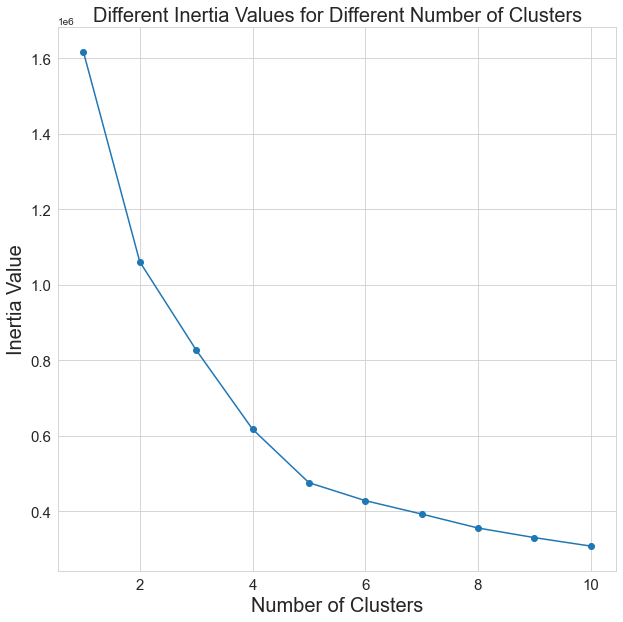

In [136]:
# plot the inertia curve
plt.plot(range(1,11),pca_inertia_list121)
plt.scatter(range(1,11),pca_inertia_list121)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [155]:
data_new_1 = data.drop(['PatientID', 'PatientAge', 'Number of providers', 'SecondaryImpression',
                        'DispatchedIncidentType','ArrivedIncidentType', 'UnitStation',
                        'FinalIncidentTypeDescription','ResponseUnitID',
                        'UnitArrivalOrder','Facility Name','TransportUnitID','TourOfShift',
                        'Unitotheractions_taken', 'Unitprimaryactions_taken', 'ProcedurePerformed', 'MedicationGiven', 
                        'UnitType'], axis =1)


In [156]:
data_new_1.columns

Index(['ShiftDay', 'IncidentFirstDue', 'InitialIncidentType',
       'FinalIncidentType', 'TransportLOC', 'TransportHospitalCode',
       'ReasonForChoosingHospital', 'Total_Number_of_procedures_performed',
       'Procedure_given_ALS?', 'Total_Number_of_medications_given',
       'Medication_given_ALS?', 'Number_of_units_responded',
       'Number_of_units_transported', 'Travel_time_taken',
       'Time_taken_to_be_atscene', 'Total_time_from_report_hospital',
       'clean_primary_impression', 'Facility_Type_Of_Facility',
       'Facility_Hospital_Designation_List', 'Distance'],
      dtype='object')

In [157]:
data_new_1 = pd.get_dummies(data_new_1, columns = ['InitialIncidentType','Facility_Type_Of_Facility','FinalIncidentType', 'TransportLOC',
                                         'Procedure_given_ALS?','IncidentFirstDue', 
                                           'Medication_given_ALS?', 'clean_primary_impression', 'ShiftDay'])

In [158]:
data_new_1

,TransportHospitalCode,ReasonForChoosingHospital,Total_Number_of_procedures_performed,Total_Number_of_medications_given,Number_of_units_responded,Number_of_units_transported,Travel_time_taken,Time_taken_to_be_atscene,Total_time_from_report_hospital,Facility_Hospital_Designation_List,...,clean_primary_impression_ob,clean_primary_impression_pain,clean_primary_impression_respiratory,clean_primary_impression_sepsis,clean_primary_impression_stroke,clean_primary_impression_syncope,clean_primary_impression_weakness,ShiftDay_A,ShiftDay_B,ShiftDay_C
0,47.0,closest facility,0.0,0.0,5,1,4.0,23.0,27.0,hospital,...,0,0,0,0,0,0,0,0,1,0
1,47.0,protocol,2.0,0.0,5,1,19.0,27.0,47.0,hospital,...,0,0,0,0,0,0,0,0,1,0
2,47.0,closest facility,0.0,0.0,0,1,2.0,11.0,14.0,hospital,...,0,1,0,0,0,0,0,1,0,0
3,47.0,closest facility,0.0,0.0,1,1,1.0,6.0,7.0,hospital,...,0,0,0,0,0,0,1,1,0,0
4,47.0,closest facility,3.0,2.0,1,1,8.0,25.0,33.0,hospital,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123778,363.0,patient choice,1.0,0.0,8,1,23.0,31.0,54.0,none,...,0,0,0,0,0,0,0,0,0,1
123779,363.0,patient choice,1.0,0.0,1,1,104.0,31.0,135.0,none,...,0,0,0,0,0,0,0,1,0,0
123780,700.0,patient choice,1.0,1.0,1,1,20.0,24.0,45.0,none,...,0,0,0,0,0,0,0,0,1,0
123781,700.0,patient choice,1.0,0.0,1,1,26.0,32.0,59.0,none,...,0,0,0,0,0,0,1,1,0,0


In [159]:
data_new_1 = pd.concat([data_new_1.drop('ReasonForChoosingHospital', 1), data_new_1['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_new_1 = pd.concat([data_new_1.drop('Facility_Hospital_Designation_List', 1), data_new_1['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/416119221.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new_1 = pd.concat([data_new_1.drop('ReasonForChoosingHospital', 1), data_new_1['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/416119221.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_new_1 = pd.concat([data_new_1.drop('ReasonForChoosingHospital', 1), data_new_1['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/416119221.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new_1 = pd.concat([data_new_1.dro

In [160]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list_new = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_new_1)
    inertia_list_new.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 714066290.8253218.
Iteration 1, inertia 479035651.59849036.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3667593954.8847246.
Iteration 1, inertia 479035651.59849036.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 582770266.1860036.
Iteration 1, inertia 479035651.59849036.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 583703472.1487069.
Iteration 1, inertia 479035651.59849036.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1373866381.5745926.
Iteration 1, inertia 479035651.59849036.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 188252886.8234548
Iteration 1, inertia 157645524.1489821
Converged at iteration 1: center shift 0.0005449328142325019 within tolerance 0.002138101201244889.
Initialization complete
Iteration 0, iner

Initialization complete
Iteration 0, inertia 47195809.549515635
Iteration 1, inertia 28664013.612688772
Iteration 2, inertia 27819568.469222374
Iteration 3, inertia 27703755.17794343
Iteration 4, inertia 27670223.894706406
Iteration 5, inertia 27656554.180266082
Iteration 6, inertia 27649713.515615515
Iteration 7, inertia 27646506.040027183
Iteration 8, inertia 27645018.033987142
Iteration 9, inertia 27644381.196398422
Iteration 10, inertia 27644079.286436565
Converged at iteration 10: center shift 0.002107590087578503 within tolerance 0.002138101201244889.
Initialization complete
Iteration 0, inertia 44301364.20060408
Iteration 1, inertia 28207742.179939717
Iteration 2, inertia 27792598.993986193
Iteration 3, inertia 27705175.089825764
Iteration 4, inertia 27671254.226066876
Iteration 5, inertia 27656989.724491674
Iteration 6, inertia 27649958.360053867
Iteration 7, inertia 27646622.574969605
Iteration 8, inertia 27645077.126013953
Iteration 9, inertia 27644408.607863095
Iteration 10,

Iteration 25, inertia 23582246.80859283
Iteration 26, inertia 23581091.338859938
Iteration 27, inertia 23580227.261903085
Iteration 28, inertia 23579519.534782406
Iteration 29, inertia 23578853.620098844
Iteration 30, inertia 23578738.137319833
Iteration 31, inertia 23578691.015838068
Converged at iteration 31: center shift 4.239804171460963e-05 within tolerance 0.002138101201244889.
Initialization complete
Iteration 0, inertia 29201140.24030983
Iteration 1, inertia 23506835.12959215
Iteration 2, inertia 23295208.789260224
Iteration 3, inertia 23230786.03396278
Iteration 4, inertia 23208106.093164846
Iteration 5, inertia 23193186.55900058
Iteration 6, inertia 23182183.737528265
Iteration 7, inertia 23175141.355261117
Iteration 8, inertia 23170918.402621705
Iteration 9, inertia 23168486.236893766
Iteration 10, inertia 23166812.311430223
Iteration 11, inertia 23165387.766880386
Iteration 12, inertia 23164261.42709154
Iteration 13, inertia 23163590.91685108
Iteration 14, inertia 23163035.

Iteration 14, inertia 20894850.145225197
Iteration 15, inertia 20889005.17257393
Iteration 16, inertia 20877756.800783895
Iteration 17, inertia 20864966.273749102
Iteration 18, inertia 20856750.44019425
Iteration 19, inertia 20851798.209221102
Iteration 20, inertia 20847876.485813767
Iteration 21, inertia 20844562.728170514
Iteration 22, inertia 20840980.198242992
Iteration 23, inertia 20837945.23083692
Iteration 24, inertia 20835619.015602235
Iteration 25, inertia 20833881.93792057
Iteration 26, inertia 20832310.543159887
Iteration 27, inertia 20831199.288245413
Iteration 28, inertia 20830440.391282134
Iteration 29, inertia 20829857.925616574
Iteration 30, inertia 20829138.938134402
Iteration 31, inertia 20828615.146879565
Iteration 32, inertia 20827545.311525486
Iteration 33, inertia 20826476.220708817
Iteration 34, inertia 20825784.629513003
Iteration 35, inertia 20825112.943182535
Iteration 36, inertia 20824414.295714825
Iteration 37, inertia 20823971.74713599
Iteration 38, inertia

Iteration 25, inertia 19297421.379159644
Iteration 26, inertia 19296213.135719188
Iteration 27, inertia 19295150.251954995
Iteration 28, inertia 19294086.123448074
Iteration 29, inertia 19293443.85348854
Iteration 30, inertia 19292993.079110723
Iteration 31, inertia 19292694.800667156
Iteration 32, inertia 19292442.72576791
Iteration 33, inertia 19292268.57574641
Iteration 34, inertia 19292103.562209416
Iteration 35, inertia 19291971.45926547
Iteration 36, inertia 19291868.34851721
Iteration 37, inertia 19291819.22250503
Converged at iteration 37: center shift 0.001103042295778882 within tolerance 0.002138101201244889.
Initialization complete
Iteration 0, inertia 26710096.437500194
Iteration 1, inertia 20790025.557140075
Iteration 2, inertia 20385268.098366696
Iteration 3, inertia 20103867.08294244
Iteration 4, inertia 19988648.66643679
Iteration 5, inertia 19918762.479465716
Iteration 6, inertia 19876200.91755058
Iteration 7, inertia 19837844.82180662
Iteration 8, inertia 19804884.219

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

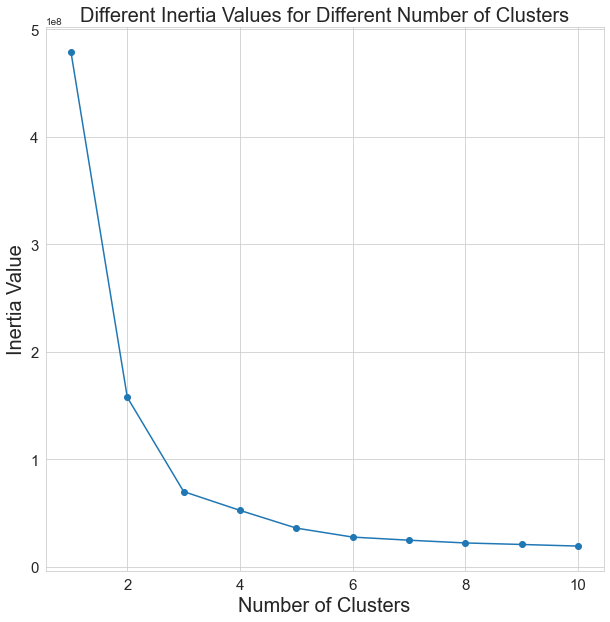

In [161]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list_new)
plt.scatter(range(1,11),inertia_list_new)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

With Dimensionality Reduction 

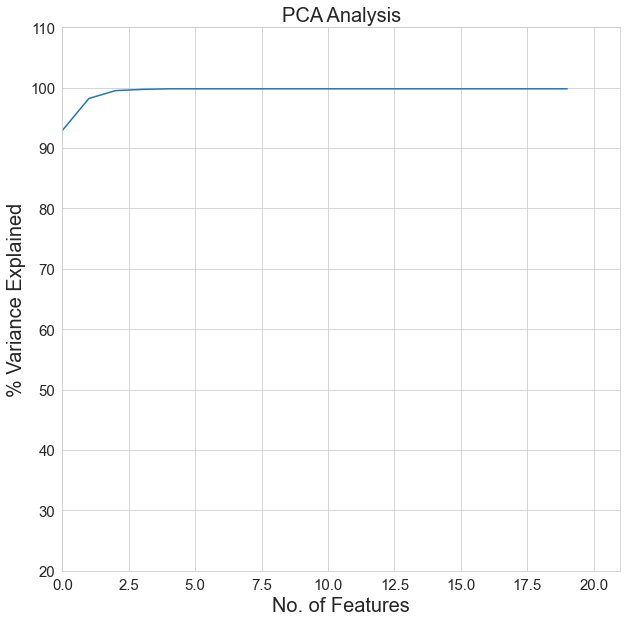

In [162]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data_new_1)

#Calculate variance ratios
variance1_new = covar_matrix.explained_variance_ratio_ 
var_voc_new =np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc_new

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(var_voc_new)

In [163]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled_new = min_max_scaler.fit_transform(data_new_1)

scaled_data_new = pd.DataFrame(np_scaled_new)

# reduce to 2 importants features

pca = PCA(n_components=2)
data_new_pca = pca.fit_transform(scaled_data_new)


In [164]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list_new = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_new_pca)
    pca_inertia_list_new.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 2038952.98876095.
Iteration 1, inertia 1346561.2757509858.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3195077.2255261443.
Iteration 1, inertia 1346561.2757509858.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2166017.85447589.
Iteration 1, inertia 1346561.2757509858.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1587307.7830173126.
Iteration 1, inertia 1346561.2757509858.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1930287.762772489.
Iteration 1, inertia 1346561.2757509858.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1323274.870422089
Iteration 1, inertia 969318.4041490576
Iteration 2, inertia 960048.0720285911
Iteration 3, inertia 939449.2497264158
Iteration 4, inertia 873703.2101696741
Iteration 5, inertia 82960

Initialization complete
Iteration 0, inertia 446001.7898148955
Iteration 1, inertia 374209.0274160126
Iteration 2, inertia 321976.66670443234
Iteration 3, inertia 298121.2165491967
Iteration 4, inertia 291871.4491240365
Iteration 5, inertia 290387.00537340634
Iteration 6, inertia 290006.61783386103
Iteration 7, inertia 289906.2641645834
Iteration 8, inertia 289875.05479863565
Converged at iteration 8: center shift 0.0002240390094616882 within tolerance 0.0005439201165551753.
Initialization complete
Iteration 0, inertia 510318.73570633645
Iteration 1, inertia 332443.4108366802
Iteration 2, inertia 302790.6573161386
Iteration 3, inertia 290809.67697097803
Iteration 4, inertia 283048.48051366257
Iteration 5, inertia 280524.7686384233
Iteration 6, inertia 279798.09859018784
Iteration 7, inertia 279558.6983897947
Iteration 8, inertia 279456.73200662876
Iteration 9, inertia 279408.1346637419
Iteration 10, inertia 279384.97235605516
Converged at iteration 10: center shift 0.000412908611270137

Iteration 14, inertia 192735.6704082441
Iteration 15, inertia 192368.83774108466
Iteration 16, inertia 192128.69319305327
Iteration 17, inertia 191939.75649668375
Iteration 18, inertia 191767.81747902764
Iteration 19, inertia 191614.8318109922
Iteration 20, inertia 191486.71164917544
Iteration 21, inertia 191361.37376071274
Iteration 22, inertia 191238.74487055442
Iteration 23, inertia 191116.65818842367
Iteration 24, inertia 190979.59219233284
Iteration 25, inertia 190834.57666221046
Iteration 26, inertia 190697.43273925025
Iteration 27, inertia 190580.17012854046
Iteration 28, inertia 190466.71981226973
Iteration 29, inertia 190361.37545350418
Iteration 30, inertia 190261.25766130196
Iteration 31, inertia 190172.1295685165
Iteration 32, inertia 190099.0003818571
Iteration 33, inertia 190039.03805456194
Iteration 34, inertia 189987.0494129682
Iteration 35, inertia 189946.3899062991
Iteration 36, inertia 189915.902376745
Iteration 37, inertia 189893.6649761949
Converged at iteration 37

Iteration 12, inertia 144332.25935617374
Converged at iteration 12: center shift 0.00046707506884231207 within tolerance 0.0005439201165551753.
Initialization complete
Iteration 0, inertia 232418.8668453411
Iteration 1, inertia 181517.8123801025
Iteration 2, inertia 171292.72234294185
Iteration 3, inertia 167497.46391032217
Iteration 4, inertia 165524.37152167546
Iteration 5, inertia 164280.85679855695
Iteration 6, inertia 163271.23007514002
Iteration 7, inertia 162332.22828000126
Iteration 8, inertia 161496.38233725855
Iteration 9, inertia 160863.12718173454
Iteration 10, inertia 160425.76267183825
Iteration 11, inertia 160054.01177812327
Iteration 12, inertia 159699.82662581457
Iteration 13, inertia 159373.60644604714
Iteration 14, inertia 159062.83572734916
Iteration 15, inertia 158796.32196093054
Iteration 16, inertia 158587.77891688579
Iteration 17, inertia 158435.74876267888
Iteration 18, inertia 158333.51021309505
Iteration 19, inertia 158257.23932127652
Iteration 20, inertia 15

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

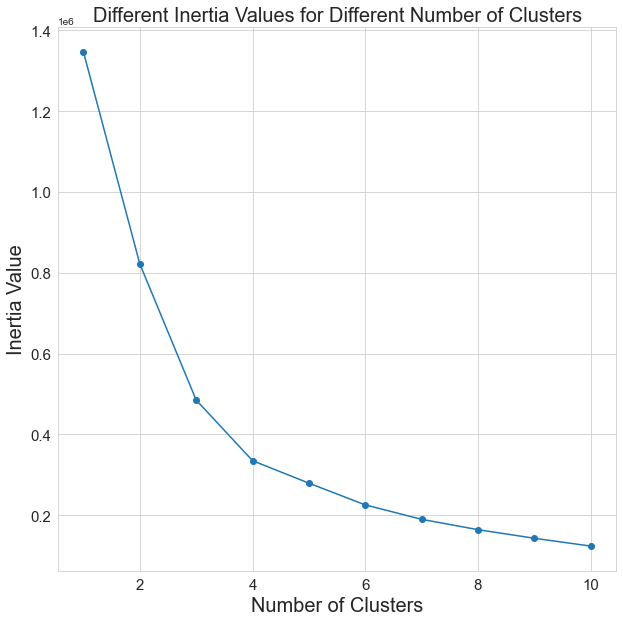

In [165]:
# plot the inertia curve
plt.plot(range(1,11),pca_inertia_list_new)
plt.scatter(range(1,11),pca_inertia_list_new)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [184]:
data_ndh = data.drop(['PatientID', 'Procedure_given_ALS?', 
                      'Medication_given_ALS?', 'Total_Number_of_procedures_performed',
                      'Total_Number_of_medications_given','Number_of_units_responded',
                      'Time_taken_to_be_atscene', 'Total_time_from_report_hospital', 
                      'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType', 
                      'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation',
                      'UnitArrivalOrder','TransportUnitID','ShiftDay', 'TourOfShift',
                      'TransportHospitalCode','Number_of_units_transported','Unitotheractions_taken',
                      'ProcedurePerformed', 'MedicationGiven', 'Facility Name',
                      'Facility_Type_Of_Facility','UnitType', 'clean_primary_impression'], axis =1)


In [185]:
data_ndh

,IncidentFirstDue,FinalIncidentType,TransportLOC,ReasonForChoosingHospital,PatientAge,Travel_time_taken,Number of providers,Unitprimaryactions_taken,Facility_Hospital_Designation_List
0,409.0,ASSAULT,Level 4 (BLS Care),closest facility,Teens,4.0,1,|transport person,hospital
1,409.0,ASSAULT,Level 2 (ALS Care),protocol,Teens,19.0,2,|als,hospital
2,409.0,MEDICAL,Level 4 (BLS Care),closest facility,Old_people,2.0,1,|bls,hospital
3,409.0,ALS,Level 4 (BLS Care),closest facility,Young_Adults,1.0,1,|bls,hospital
4,409.0,ALS,Level 3 (ALS Care),closest facility,Old_people,8.0,1,|transport person,hospital
...,...,...,...,...,...,...,...,...,...
123778,405.0,ACCI,Level 4 (BLS Care),patient choice,Adults,23.0,1,|transport person,none
123779,413.0,ODF,Level 3 (ALS Care),patient choice,Young_Adults,104.0,1,|als,none
123780,413.0,ALS,Level 3 (ALS Care),patient choice,Old_people,20.0,1,|control traffic,none
123781,432.0,ALS,Level 3 (ALS Care),patient choice,Adults,26.0,1,|als,none


In [186]:
data_ndh = pd.get_dummies(data_ndh, columns = ['FinalIncidentType', 'TransportLOC',
                                         'IncidentFirstDue'
                                         , 'PatientAge'])

In [187]:
data_ndh = pd.concat([data_ndh.drop('ReasonForChoosingHospital', 1), data_ndh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_ndh = pd.concat([data_ndh.drop('Facility_Hospital_Designation_List', 1), data_ndh['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)
data_ndh = pd.concat([data_ndh.drop('Unitprimaryactions_taken', 1), data_ndh['Unitprimaryactions_taken'].str.get_dummies(sep="|").add_prefix('Unitprimaryactions_taken')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1275202419.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_ndh = pd.concat([data_ndh.drop('ReasonForChoosingHospital', 1), data_ndh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1275202419.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_ndh = pd.concat([data_ndh.drop('ReasonForChoosingHospital', 1), data_ndh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1275202419.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_ndh = pd.concat([data_ndh.drop('Facility_H

In [188]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list_ndh = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_ndh)
    inertia_list_ndh.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 8581470.200509755.
Iteration 1, inertia 5968664.032448765.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9694543.812025957.
Iteration 1, inertia 5968664.032448765.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6958962.977477351.
Iteration 1, inertia 5968664.032448765.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 18712383.86960697.
Iteration 1, inertia 5968664.032448765.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7554901.588993553.
Iteration 1, inertia 5968664.032448765.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6687189.035058361
Iteration 1, inertia 2843936.0975884316
Iteration 2, inertia 2799259.39575968
Iteration 3, inertia 2788195.7482956694
Iteration 4, inertia 2765705.9901761953
Converged at iteration 4: str

Iteration 6, inertia 1030136.9007432808
Converged at iteration 6: center shift 1.6437446568069777e-05 within tolerance 3.9523582136320235e-05.
Initialization complete
Iteration 0, inertia 1662267.3659611489
Iteration 1, inertia 1069498.1565264822
Iteration 2, inertia 1047836.0429245534
Iteration 3, inertia 1028698.8857739127
Iteration 4, inertia 999008.3099262443
Iteration 5, inertia 982921.222004148
Iteration 6, inertia 967496.8736325182
Iteration 7, inertia 966953.01040042
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1815679.0743094382
Iteration 1, inertia 1121545.5378308133
Iteration 2, inertia 1069916.9637805582
Iteration 3, inertia 1051826.0562904058
Iteration 4, inertia 1041410.2900146391
Iteration 5, inertia 1026974.9288027955
Iteration 6, inertia 1026466.0603118676
Iteration 7, inertia 1023806.4016152758
Iteration 8, inertia 1023805.0357761843
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia

Iteration 4, inertia 887529.7277786816
Iteration 5, inertia 887045.5521220372
Iteration 6, inertia 885680.7417681866
Iteration 7, inertia 884537.3056883446
Iteration 8, inertia 883893.1481776151
Iteration 9, inertia 883698.1497127842
Iteration 10, inertia 882934.1663069243
Iteration 11, inertia 882115.5791840602
Iteration 12, inertia 881682.010141936
Iteration 13, inertia 879772.0853100312
Iteration 14, inertia 879155.5057529688
Converged at iteration 14: strict convergence.


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

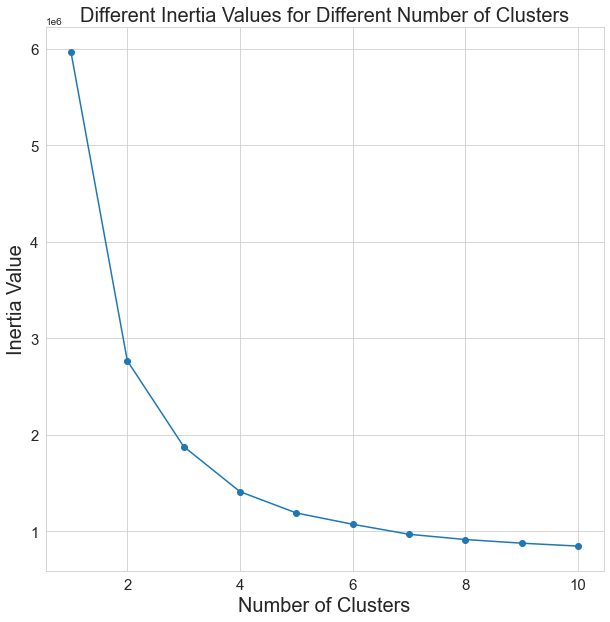

In [189]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list_ndh)
plt.scatter(range(1,11),inertia_list_ndh)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

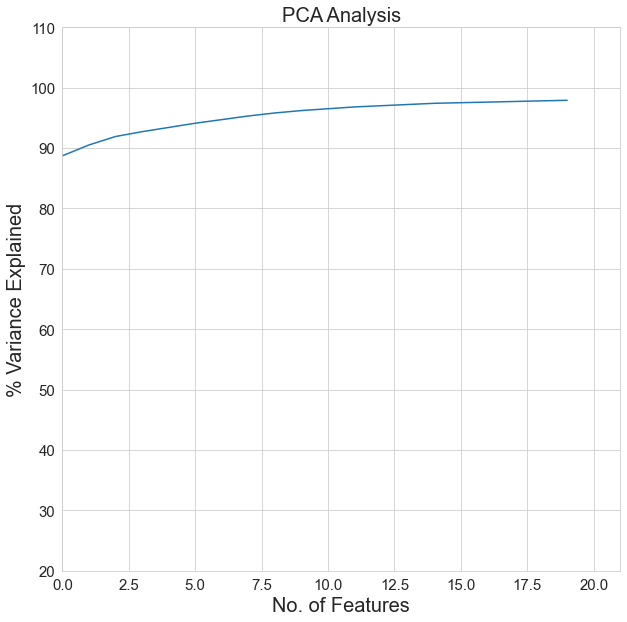

In [206]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data_ndh)

#Calculate variance ratios
variance_ndh = covar_matrix.explained_variance_ratio_ 
var_voc_ndh = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc_ndh

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(var_voc_ndh)

In [210]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled_ndh = min_max_scaler.fit_transform(data_ndh)

scaled_data_ndh = pd.DataFrame(np_scaled_ndh)

# reduce to 2 importants feature

pca = PCA(n_components= 3)
data_ndh_pca = pca.fit_transform(scaled_data_ndh)


In [211]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list_ndh = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_ndh_pca)
    pca_inertia_list_ndh.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 2635619.8260202915.
Iteration 1, inertia 1254429.0495354682.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2779934.085009472.
Iteration 1, inertia 1254429.0495354685.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2860791.215627373.
Iteration 1, inertia 1254429.0495354685.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2444422.345269303.
Iteration 1, inertia 1254429.0495354685.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2329596.6581485937.
Iteration 1, inertia 1254429.0495354685.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1093610.0660612695
Iteration 1, inertia 846060.4079874569
Iteration 2, inertia 799167.8181319307
Iteration 3, inertia 780744.5959432716
Iteration 4, inertia 779805.1368565093
Converged at iteration 

Iteration 1, inertia 291411.3859136045
Iteration 2, inertia 270113.6231189959
Iteration 3, inertia 264619.5839037916
Iteration 4, inertia 263629.57752456574
Iteration 5, inertia 263525.4762997484
Converged at iteration 5: center shift 0.00030266820045405865 within tolerance 0.0003378032658053398.
Initialization complete
Iteration 0, inertia 422421.6254501209
Iteration 1, inertia 285755.1538685061
Iteration 2, inertia 272771.2580071494
Iteration 3, inertia 270315.4063919569
Iteration 4, inertia 269955.77126970456
Iteration 5, inertia 269885.05376305303
Iteration 6, inertia 269866.73797936947
Converged at iteration 6: center shift 0.00020397675513959633 within tolerance 0.0003378032658053398.
Initialization complete
Iteration 0, inertia 362910.02313792356
Iteration 1, inertia 293593.5567807099
Iteration 2, inertia 284598.6082198398
Iteration 3, inertia 279924.7695247618
Iteration 4, inertia 278095.51692138077
Iteration 5, inertia 277777.03522763355
Iteration 6, inertia 277661.1209667333


Initialization complete
Iteration 0, inertia 269279.44210620894
Iteration 1, inertia 206883.9101256185
Iteration 2, inertia 203379.8314505545
Iteration 3, inertia 202588.17154546393
Iteration 4, inertia 202358.41113058437
Iteration 5, inertia 202236.43981808872
Iteration 6, inertia 202161.02019964234
Iteration 7, inertia 202103.03699211433
Iteration 8, inertia 202050.91889226556
Iteration 9, inertia 201976.91972970526
Iteration 10, inertia 201891.03769378655
Iteration 11, inertia 201794.14748716465
Iteration 12, inertia 201689.28168353526
Iteration 13, inertia 201590.11987609765
Iteration 14, inertia 201487.43389070322
Iteration 15, inertia 201380.64465286158
Iteration 16, inertia 201296.66430287497
Iteration 17, inertia 201242.18839298608
Iteration 18, inertia 201208.19620348443
Iteration 19, inertia 201179.32005051587
Iteration 20, inertia 201161.49170447947
Iteration 21, inertia 201149.6465592841
Iteration 22, inertia 201142.00474589324
Converged at iteration 22: center shift 0.0002

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

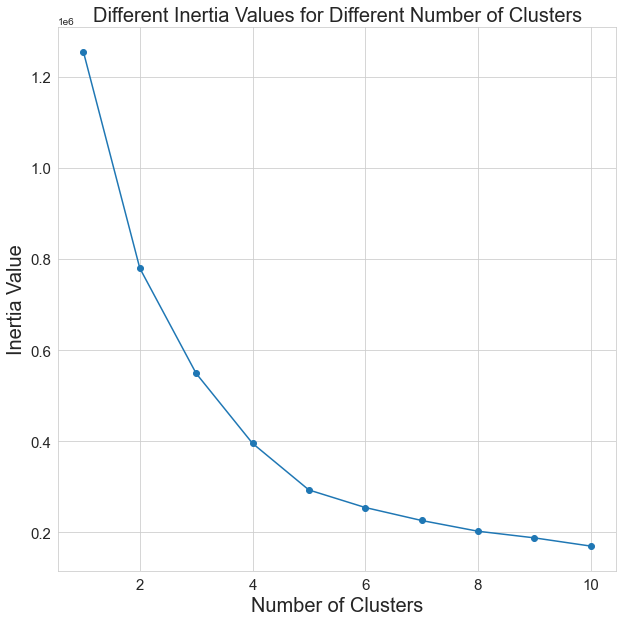

In [212]:
# plot the inertia curve
plt.plot(range(1,11),pca_inertia_list_ndh)
plt.scatter(range(1,11),pca_inertia_list_ndh)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [196]:
data_mm = data.drop(['PatientID', 'IncidentFirstDue', 'FinalIncidentType', 'Total_Number_of_procedures_performed',
                      'Total_Number_of_medications_given','Number_of_units_responded',
                      'Time_taken_to_be_atscene', 'Total_time_from_report_hospital', 
                      'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType', 
                      'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation',
                      'UnitArrivalOrder','TransportUnitID','ShiftDay', 'TourOfShift',
                      'TransportHospitalCode','Number_of_units_transported','Unitotheractions_taken',
                      'ProcedurePerformed', 'MedicationGiven', 'Facility Name',
                      'Facility_Type_Of_Facility','UnitType', 'PatientAge', 'Unitprimaryactions_taken'], axis =1)


In [197]:
data_mm

,TransportLOC,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,Travel_time_taken,clean_primary_impression,Number of providers,Facility_Hospital_Designation_List
0,Level 4 (BLS Care),closest facility,none_given,none_given,4.0,injury,1,hospital
1,Level 2 (ALS Care),protocol,0.0,none_given,19.0,gi/gu,2,hospital
2,Level 4 (BLS Care),closest facility,none_given,none_given,2.0,pain,1,hospital
3,Level 4 (BLS Care),closest facility,none_given,none_given,1.0,weakness,1,hospital
4,Level 3 (ALS Care),closest facility,1.0,0.0,8.0,respiratory,1,hospital
...,...,...,...,...,...,...,...,...
123778,Level 4 (BLS Care),patient choice,0.0,none_given,23.0,injury,1,none
123779,Level 3 (ALS Care),patient choice,0.0,none_given,104.0,abuse of drugs or overdose,1,none
123780,Level 3 (ALS Care),patient choice,0.0,0.0,20.0,gi/gu,1,none
123781,Level 3 (ALS Care),patient choice,0.0,none_given,26.0,weakness,1,none


In [198]:
data_mm = pd.get_dummies(data_mm, columns = ['Procedure_given_ALS?', 'TransportLOC',
                                         'Medication_given_ALS?'
                                         , 'clean_primary_impression'])

In [199]:
data_mm = pd.concat([data_mm.drop('ReasonForChoosingHospital', 1), data_mm['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_mm = pd.concat([data_mm.drop('Facility_Hospital_Designation_List', 1), data_mm['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/306997654.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_mm = pd.concat([data_mm.drop('ReasonForChoosingHospital', 1), data_mm['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/306997654.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_mm = pd.concat([data_mm.drop('ReasonForChoosingHospital', 1), data_mm['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/306997654.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_mm = pd.concat([data_mm.drop('Facility_Hospital_Des

In [204]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list_mm_1 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_mm)
    inertia_list_mm_1.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 9654606.696863938.
Iteration 1, inertia 5826466.2181447055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6472373.142928746.
Iteration 1, inertia 5826466.2181447055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6334407.7544449475.
Iteration 1, inertia 5826466.2181447055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 12229987.03505836.
Iteration 1, inertia 5826466.2181447055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6944776.977477351.
Iteration 1, inertia 5826466.2181447055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4234501.754444947
Iteration 1, inertia 2638692.6152169164
Iteration 2, inertia 2623894.3820965663
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4309538.14

Initialization complete
Iteration 0, inertia 1323167.8848294932
Iteration 1, inertia 861682.8825233404
Iteration 2, inertia 856123.4527651035
Iteration 3, inertia 855765.7379488265
Converged at iteration 3: center shift 3.3401570144227486e-06 within tolerance 8.558182417682228e-05.
Initialization complete
Iteration 0, inertia 1308063.5756443576
Iteration 1, inertia 855448.4907508922
Iteration 2, inertia 842063.7665883016
Iteration 3, inertia 839559.161146458
Converged at iteration 3: center shift 8.078965121090151e-07 within tolerance 8.558182417682228e-05.
Initialization complete
Iteration 0, inertia 1395522.3659611489
Iteration 1, inertia 856707.1247229617
Iteration 2, inertia 831280.4948155009
Iteration 3, inertia 828029.2147087057
Iteration 4, inertia 827031.0144742262
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1285272.7208924885
Iteration 1, inertia 895547.9735631868
Iteration 2, inertia 886493.3653154129
Iteration 3, inertia 869567.

Iteration 4, inertia 703378.0062999262
Iteration 5, inertia 702161.6380218077
Iteration 6, inertia 701845.1493328928
Iteration 7, inertia 701739.5962790607
Iteration 8, inertia 701712.1763496283
Iteration 9, inertia 701699.511403624
Iteration 10, inertia 701695.6797930165
Iteration 11, inertia 701690.9704819927
Converged at iteration 11: center shift 2.8224026352170527e-05 within tolerance 8.558182417682228e-05.


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

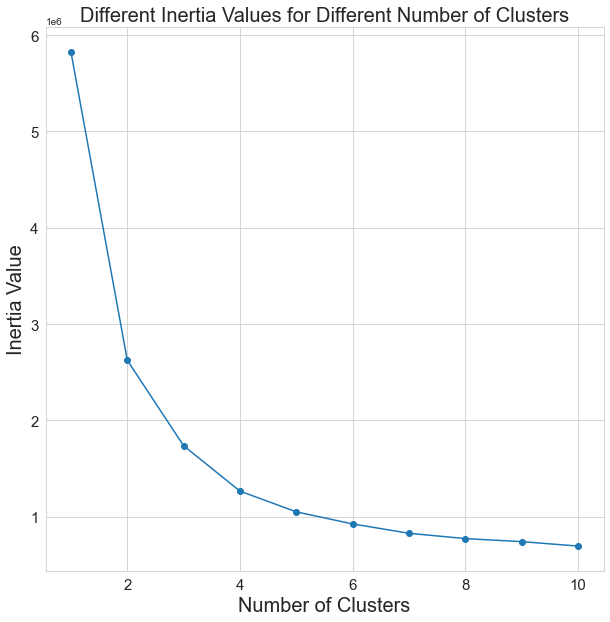

In [205]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list_mm_1)
plt.scatter(range(1,11),inertia_list_mm_1)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

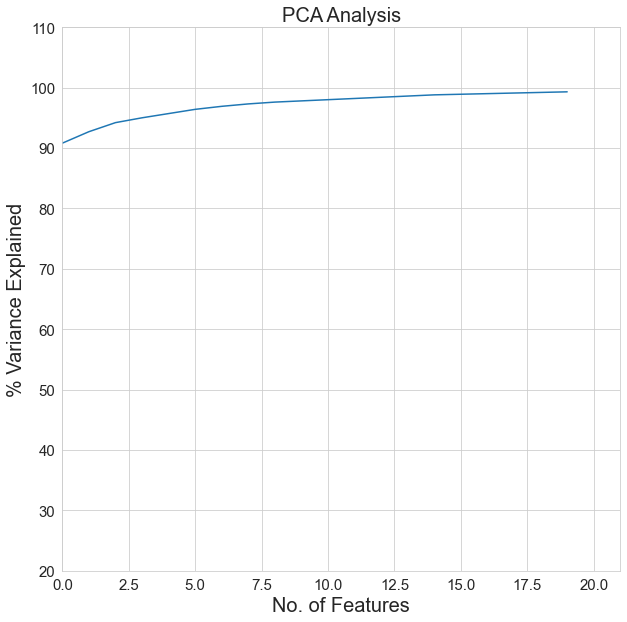

In [213]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data_mm)

#Calculate variance ratios
variance_mm = covar_matrix.explained_variance_ratio_ 
var_voc_mm =np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc_mm

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(var_voc_mm)

In [214]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled_mm = min_max_scaler.fit_transform(data_mm)

scaled_data_mm = pd.DataFrame(np_scaled_mm)

# reduce to 2 importants feature

pca = PCA(n_components= 3)
data_mm_pca = pca.fit_transform(scaled_data_mm)


In [215]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list_mm = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_mm_pca)
    pca_inertia_list_mm.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 3279730.140368622.
Iteration 1, inertia 1255057.250097741.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3310032.391749601.
Iteration 1, inertia 1255057.250097741.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2284156.43788901.
Iteration 1, inertia 1255057.250097741.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2749401.3664700403.
Iteration 1, inertia 1255057.250097741.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1656361.391406512.
Iteration 1, inertia 1255057.250097741.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1106205.5596601502
Iteration 1, inertia 899927.939853726
Iteration 2, inertia 890734.2118817591
Iteration 3, inertia 886339.779431739
Iteration 4, inertia 883987.3425202684
Iteration 5, inertia 883119.1081

Iteration 2, inertia 453525.41411389527
Iteration 3, inertia 449251.80518564367
Iteration 4, inertia 445568.27308870724
Iteration 5, inertia 436815.87322974566
Iteration 6, inertia 431628.752497024
Iteration 7, inertia 431386.2991209456
Iteration 8, inertia 431360.2955804797
Converged at iteration 8: center shift 9.129062475687896e-05 within tolerance 0.00033797243296675974.
Initialization complete
Iteration 0, inertia 610801.4344930112
Iteration 1, inertia 493151.7157161851
Iteration 2, inertia 438193.17929762066
Iteration 3, inertia 427536.89496172615
Iteration 4, inertia 422557.5748361854
Iteration 5, inertia 420499.50815057533
Iteration 6, inertia 419010.4671747085
Iteration 7, inertia 418410.2805151476
Iteration 8, inertia 418161.63166363654
Iteration 9, inertia 418045.00423215295
Iteration 10, inertia 417950.4631484505
Iteration 11, inertia 417750.39539693546
Iteration 12, inertia 417299.44323484914
Iteration 13, inertia 416889.88985204743
Iteration 14, inertia 416281.2323278737


Initialization complete
Iteration 0, inertia 343804.37419706257
Iteration 1, inertia 265181.4604626295
Iteration 2, inertia 259080.08025462175
Iteration 3, inertia 257224.57673698512
Iteration 4, inertia 256480.6653424621
Iteration 5, inertia 255924.51642939643
Iteration 6, inertia 255502.514108242
Iteration 7, inertia 255231.84091231792
Iteration 8, inertia 255025.94159386086
Iteration 9, inertia 254725.26199244335
Iteration 10, inertia 254294.41681938616
Iteration 11, inertia 253678.92146747393
Iteration 12, inertia 253246.05442550965
Iteration 13, inertia 253057.11279274948
Iteration 14, inertia 252823.88663154072
Iteration 15, inertia 252297.5541936477
Iteration 16, inertia 251274.0668423693
Iteration 17, inertia 249875.0766535708
Iteration 18, inertia 248773.30679896858
Iteration 19, inertia 248473.27999235524
Iteration 20, inertia 248422.71886586267
Iteration 21, inertia 248412.0373193938
Converged at iteration 21: center shift 7.552579306723704e-05 within tolerance 0.00033797243

Iteration 15, inertia 176768.56398274162
Iteration 16, inertia 176756.73655660445
Converged at iteration 16: center shift 0.00025057624393234207 within tolerance 0.00033797243296675974.
Initialization complete
Iteration 0, inertia 263177.66942457086
Iteration 1, inertia 191683.4693614833
Iteration 2, inertia 184676.069750374
Iteration 3, inertia 178787.11335336365
Iteration 4, inertia 176838.82458917954
Iteration 5, inertia 176002.8082235929
Iteration 6, inertia 175643.73730783595
Iteration 7, inertia 175348.34389670688
Iteration 8, inertia 175097.91632542812
Iteration 9, inertia 174875.29395685595
Iteration 10, inertia 174727.73348014615
Iteration 11, inertia 174643.9937898252
Iteration 12, inertia 174599.77507328725
Iteration 13, inertia 174587.07184433268
Iteration 14, inertia 174582.7007231363
Converged at iteration 14: center shift 0.0002464979695434127 within tolerance 0.00033797243296675974.
Initialization complete
Iteration 0, inertia 264310.42145121284
Iteration 1, inertia 200

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

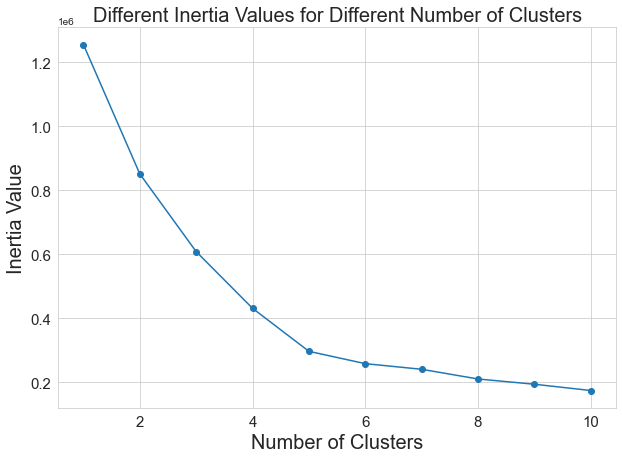

In [217]:
# plot the inertia curve
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(range(1,11),pca_inertia_list_mm)
plt.scatter(range(1,11),pca_inertia_list_mm)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [218]:
data_dd = data_mm = data.drop(['TransportLOC','Number of providers', 'PatientID', 'IncidentFirstDue', 'FinalIncidentType', 'Total_Number_of_procedures_performed',
                      'Total_Number_of_medications_given','Number_of_units_responded',
                      'Time_taken_to_be_atscene', 'Total_time_from_report_hospital', 
                      'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType', 
                      'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation',
                      'UnitArrivalOrder','TransportUnitID','ShiftDay', 'TourOfShift',
                      'TransportHospitalCode','Number_of_units_transported','Unitotheractions_taken',
                      'ProcedurePerformed', 'MedicationGiven', 'Facility Name',
                      'Facility_Type_Of_Facility','UnitType', 'PatientAge', 'Unitprimaryactions_taken'], axis =1)


In [220]:
data_dd

,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,Travel_time_taken,clean_primary_impression,Facility_Hospital_Designation_List
0,closest facility,none_given,none_given,4.0,injury,hospital
1,protocol,0.0,none_given,19.0,gi/gu,hospital
2,closest facility,none_given,none_given,2.0,pain,hospital
3,closest facility,none_given,none_given,1.0,weakness,hospital
4,closest facility,1.0,0.0,8.0,respiratory,hospital
...,...,...,...,...,...,...
123778,patient choice,0.0,none_given,23.0,injury,none
123779,patient choice,0.0,none_given,104.0,abuse of drugs or overdose,none
123780,patient choice,0.0,0.0,20.0,gi/gu,none
123781,patient choice,0.0,none_given,26.0,weakness,none


In [223]:
data_dd = pd.get_dummies(data_dd, columns = ['Procedure_given_ALS?',
                                         'Medication_given_ALS?'
                                         , 'clean_primary_impression'])

In [224]:
data_dd = pd.concat([data_dd.drop('ReasonForChoosingHospital', 1), data_dd['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_dd = pd.concat([data_dd.drop('Facility_Hospital_Designation_List', 1), data_dd['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1582395324.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_dd = pd.concat([data_dd.drop('ReasonForChoosingHospital', 1), data_dd['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1582395324.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_dd = pd.concat([data_dd.drop('ReasonForChoosingHospital', 1), data_dd['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_15188/1582395324.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_dd = pd.concat([data_dd.drop('Facility_Hospital_

In [226]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list_dd_1 = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_dd)
    inertia_list_dd_1.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 35067565.58170192.
Iteration 1, inertia 5731096.882064639.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7250199.588993553.
Iteration 1, inertia 5731096.882064639.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6849456.531412544.
Iteration 1, inertia 5731096.882064639.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9040782.812025957.
Iteration 1, inertia 5731096.882064639.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 15937584.258090762.
Iteration 1, inertia 5731096.882064639.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6187002.977477351
Iteration 1, inertia 2940341.274927127
Iteration 2, inertia 2752084.910142465
Iteration 3, inertia 2638383.2306790454
Iteration 4, inertia 2584458.860363083
Iteration 5, inertia 2540082.

Iteration 0, inertia 1315046.3713008272
Iteration 1, inertia 778411.9072639588
Iteration 2, inertia 747985.175837035
Iteration 3, inertia 746766.3172231277
Iteration 4, inertia 746265.1219595906
Iteration 5, inertia 745914.0440808831
Iteration 6, inertia 745788.4099651476
Iteration 7, inertia 744535.7013953897
Iteration 8, inertia 736692.5938197693
Iteration 9, inertia 727076.0059362287
Converged at iteration 9: center shift 6.031317831710533e-06 within tolerance 9.259909490097533e-05.
Initialization complete
Iteration 0, inertia 1380602.966797995
Iteration 1, inertia 846918.8627918775
Iteration 2, inertia 799378.0565343982
Iteration 3, inertia 764765.2596196587
Iteration 4, inertia 757752.9021926243
Iteration 5, inertia 755378.6391078593
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1284331.754444947
Iteration 1, inertia 803005.2517181581
Iteration 2, inertia 773322.2121962223
Iteration 3, inertia 758479.0748372949
Iteration 4, inertia 7436

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

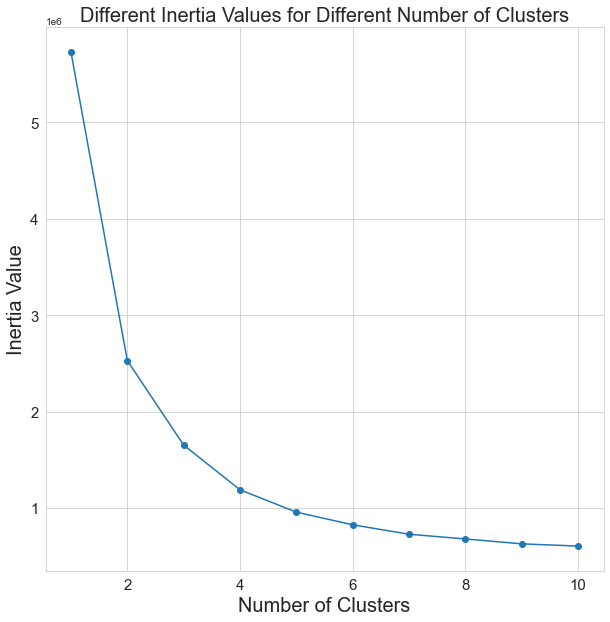

In [227]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list_dd_1)
plt.scatter(range(1,11),inertia_list_dd_1)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

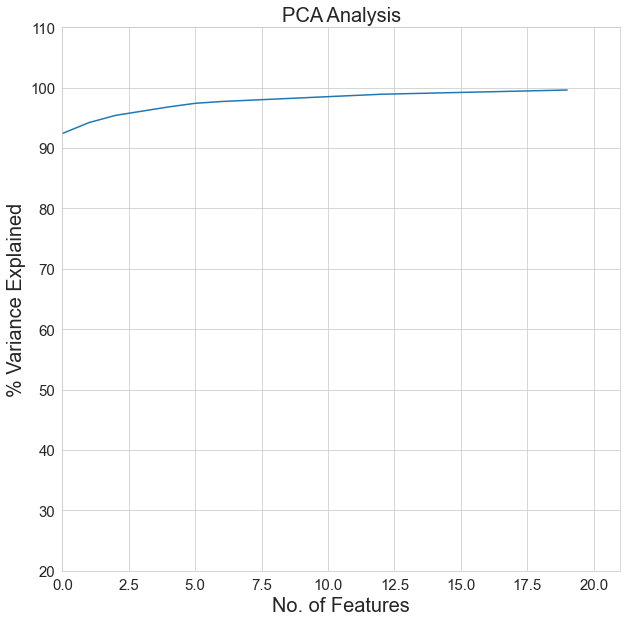

In [228]:
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(data_dd)

#Calculate variance ratios
variance_dd = covar_matrix.explained_variance_ratio_ 
var_voc_dd =np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_voc_dd

plt.ylabel('% Variance Explained',size=20)
plt.xlabel('No. of Features', size=20)
plt.title('PCA Analysis', size = 20)
plt.ylim(20,110)
plt.xlim(0,21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(var_voc_dd)

In [229]:
min_max_scaler = preprocessing.StandardScaler()

np_scaled_dd = min_max_scaler.fit_transform(data_dd)

scaled_data_dd = pd.DataFrame(np_scaled_dd)

# reduce to 2 importants feature

pca = PCA(n_components= 3)
data_dd_pca = pca.fit_transform(scaled_data_dd)


In [230]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pca_inertia_list_dd = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 5, verbose=1)
    kmeans_model.fit(data_dd_pca)
    pca_inertia_list_dd.append(kmeans_model.inertia_)

Initialization complete
Iteration 0, inertia 1910518.9745114963.
Iteration 1, inertia 1087761.569399653.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2050052.1407045156.
Iteration 1, inertia 1087761.569399653.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3039301.8017678694.
Iteration 1, inertia 1087761.569399653.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1972721.3475328884.
Iteration 1, inertia 1087761.569399653.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2302276.2957927817.
Iteration 1, inertia 1087761.569399653.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1099081.6886590328
Iteration 1, inertia 777872.6813253833
Iteration 2, inertia 737310.4532542971
Iteration 3, inertia 690865.2798431561
Iteration 4, inertia 688245.245099676
Iteration 5, inertia 68805

Iteration 1, inertia 293634.365311114
Iteration 2, inertia 290046.0908530586
Iteration 3, inertia 289848.2702573588
Iteration 4, inertia 289737.42248938035
Iteration 5, inertia 289333.9275494862
Iteration 6, inertia 288795.5473066138
Iteration 7, inertia 288628.7108301916
Iteration 8, inertia 288586.027542606
Converged at iteration 8: center shift 0.00025904177175730043 within tolerance 0.0002929216368967288.
Initialization complete
Iteration 0, inertia 437194.92725909146
Iteration 1, inertia 296006.04856216925
Iteration 2, inertia 292686.6047144241
Iteration 3, inertia 291193.7984182413
Iteration 4, inertia 290105.7466847835
Iteration 5, inertia 289507.5877170275
Iteration 6, inertia 289376.81476747466
Iteration 7, inertia 289187.62351138936
Iteration 8, inertia 288961.3629201269
Iteration 9, inertia 288771.005249818
Iteration 10, inertia 288532.4095201085
Iteration 11, inertia 288423.5953461202
Iteration 12, inertia 288369.9592667762
Iteration 13, inertia 288323.0419925111
Iteration 

Iteration 0, inertia 313227.0431850323
Iteration 1, inertia 225573.31450296112
Iteration 2, inertia 215130.48395094395
Iteration 3, inertia 210376.91298892978
Iteration 4, inertia 204410.7964568044
Iteration 5, inertia 201205.7368924081
Iteration 6, inertia 201078.24079394146
Iteration 7, inertia 201066.4509113482
Iteration 8, inertia 201055.2618678626
Iteration 9, inertia 201034.50906096125
Iteration 10, inertia 200992.2281041747
Iteration 11, inertia 200927.33583700127
Iteration 12, inertia 200804.39876629974
Iteration 13, inertia 200444.92690796603
Iteration 14, inertia 199452.77398665238
Iteration 15, inertia 198172.18245570327
Iteration 16, inertia 197299.61402542365
Iteration 17, inertia 196476.15258760145
Iteration 18, inertia 196011.54867496577
Iteration 19, inertia 195755.95821988178
Iteration 20, inertia 195473.31077033488
Iteration 21, inertia 194877.8410251995
Iteration 22, inertia 193333.87829284262
Iteration 23, inertia 189325.07646992037
Iteration 24, inertia 185039.7384

Iteration 10, inertia 158192.30398602367
Iteration 11, inertia 158143.4481080924
Iteration 12, inertia 158079.59772127785
Iteration 13, inertia 158008.4701396069
Iteration 14, inertia 157955.23459754037
Iteration 15, inertia 157916.43019021305
Iteration 16, inertia 157880.5325614738
Iteration 17, inertia 157834.4244447705
Iteration 18, inertia 157792.876717342
Iteration 19, inertia 157750.6928120964
Iteration 20, inertia 157707.84352727293
Iteration 21, inertia 157670.3839969454
Iteration 22, inertia 157631.44101809498
Iteration 23, inertia 157584.0697562481
Iteration 24, inertia 157528.012696055
Iteration 25, inertia 157453.5143922877
Iteration 26, inertia 157372.22383822815
Iteration 27, inertia 157289.36948024092
Iteration 28, inertia 157200.91754540137
Iteration 29, inertia 157116.8637705925
Iteration 30, inertia 157026.76109964796
Iteration 31, inertia 156966.77624972753
Iteration 32, inertia 156934.95996663193
Iteration 33, inertia 156920.76620305591
Iteration 34, inertia 156915.

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

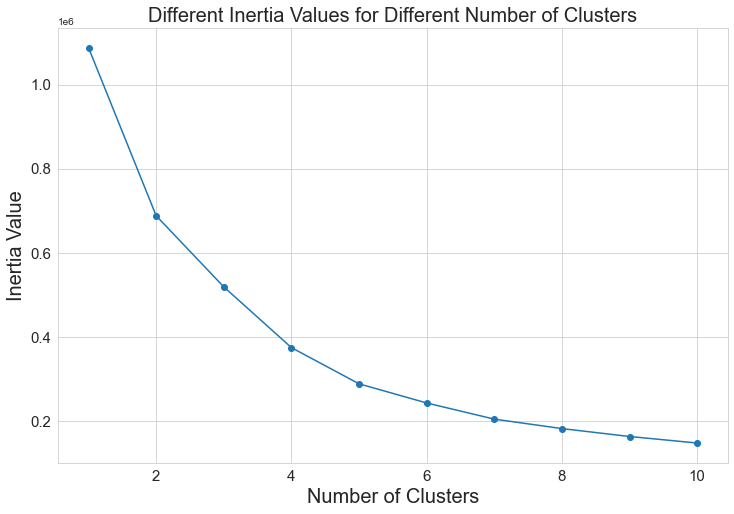

In [234]:
# plot the inertia curve
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(range(1,11),pca_inertia_list_dd)
plt.scatter(range(1,11),pca_inertia_list_dd)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia Value", size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Different Inertia Values for Different Number of Clusters", size=20)

In [235]:
init_list = ["k-means++", "random"]
inertia_list_final = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=2, init=init)
    kmeans_model.fit(data_dd)
    inertia_list_final.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list_final, columns=["Inertia Value"], index=init_list)

In [237]:
kmeans = KMeans(n_clusters = 2, init ='k-means++' ,random_state = 0)
y = kmeans.fit_predict(data_dd)
print((y))

[0 1 0 ... 1 1 1]


In [238]:
y= pd.Series(y)
data['Compliant_or_not'] = y

In [239]:
data

,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,ResponseUnitID,UnitStation,...,SecondaryImpression,Unitotheractions_taken,Unitprimaryactions_taken,ProcedurePerformed,MedicationGiven,Facility Name,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Distance,Compliant_or_not
0,B,1,409.0,SHOTF,SHOTF,SHOTF,ASSAULT,ASSAULT W/WEAPON - SHOOTING,M409B,9,...,none,|no actions,|transport person,none performed,none given,MOUNT VERNON,Hospital,hospital,0.316532,0
1,B,1,409.0,SHOTF,SHOTF,SHOTF,ASSAULT,ASSAULT W/WEAPON - SHOOTING,M409,9,...,none,|no actions,|als,iv start - extremity vein (arm or leg),none given,MOUNT VERNON,Hospital,hospital,0.316532,1
2,A,3,409.0,MEDICAL,MEDICAL,MEDICAL,MEDICAL,MEDICAL EMERGENCY,M409,9,...,none,|transport person,|bls,none performed,none given,MOUNT VERNON,Hospital,hospital,0.316532,0
3,A,3,409.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,M409,9,...,none,|no actions,|bls,none performed,none given,MOUNT VERNON,Hospital,hospital,0.316532,0
4,A,3,409.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,M409B,9,...,none,|no actions,|transport person,cv - ecg - 12 lead obtained|iv start - extremi...,ipratropium bromide(atrovent)|albuterol (vento...,MOUNT VERNON,Hospital,hospital,0.316532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123778,C,2,405.0,ACCIMF,ACCITF,ACCITF,ACCI,ACCIDENT W/INJ - POSSIBLY TRAPPED,M405,5,...,none,|no actions,|transport person,wound care - general,none given,FRANCONIA,Hospital,none,14.689935,1
123779,A,1,413.0,ODF,ODF,ODF,ODF,OVERDOSE - DRUG/ETOH/POISON,M430,30,...,none,|transport person,|als,iv start - extremity vein (arm or leg),none given,DUNN LORING,Hospital,none,21.374895,1
123780,B,3,413.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,M413,13,...,none,|no actions,|control traffic,iv start - extremity vein (arm or leg),ondansetron (zofran),DUNN LORING,Free Standing Emergency Room,none,2.043550,1
123781,A,1,432.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,M432,32,...,none,|transport person,|als,cv - ecg - 12 lead obtained,none given,FAIRVIEW,Free Standing Emergency Room,none,10.600479,1


In [240]:
data['Compliant_or_not'].value_counts()

0    89904
1    33879
Name: Compliant_or_not, dtype: int64

In [241]:
data.to_csv("/Volumes/Personal/DAEN 690 - Project/data_kmeans.csv")